# Aniket Tanpure
Data Science and Business Analytics Intern @ The Sparks Foundation
Task 2: Prediction using Unsupervised ML
Objective: From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

In [2]:
# import the required the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#import the data
data = pd.read_csv('Iris.csv')

In [5]:
# checking the first five rows of data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# checking last five rows of the data
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
# check the shape of the data
data.shape

(150, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# Getting all the unique values in each Column of Data Frame.
data['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [10]:
data['SepalWidthCm'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [11]:
data['PetalLengthCm'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [12]:
data['PetalWidthCm'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [13]:
data['SepalLengthCm'].value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: SepalLengthCm, dtype: int64

In [16]:
data['SepalWidthCm'].value_counts()

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: SepalWidthCm, dtype: int64

In [17]:
data['PetalLengthCm'].unique()

1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: PetalLengthCm, dtype: int64

In [19]:
data["PetalWidthCm"].value_counts()

0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64

In [20]:
data.groupby(["Species"]).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [21]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
# Finding Missing values in data set if any
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualising DataCorrelation.
Correlation tells us the relationship between Numarical variables present in data

In [23]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


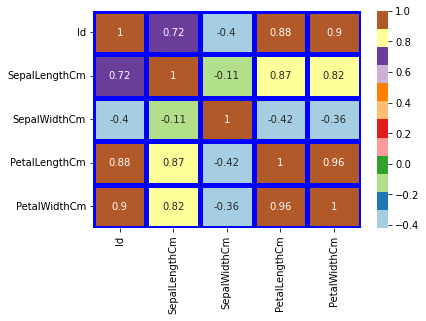

In [27]:
sns.heatmap(data.corr(), 
            cmap="Paired", 
            linecolor = "Blue" ,
            linewidth= 5 ,  
            cbar= "cividis" ,
            annot=True)
plt.show()

# Outliers detection

In [29]:
col = data.columns

In [30]:
col

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

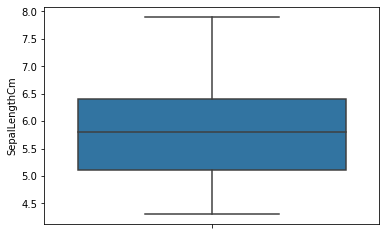

<Figure size 720x360 with 0 Axes>

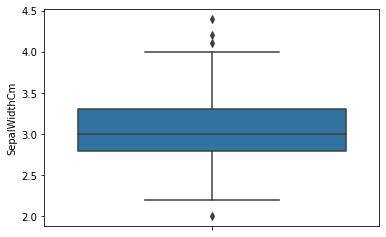

<Figure size 720x360 with 0 Axes>

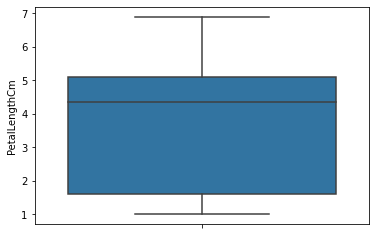

<Figure size 720x360 with 0 Axes>

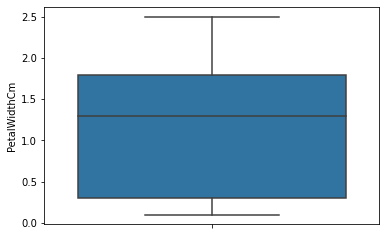

<Figure size 720x360 with 0 Axes>

In [31]:
col = data.columns
for i in col:
    if data[i].dtype=='float64':
        sns.boxplot(y=data[i])
        plt.figure(figsize=(10,5))
        plt.show()

# To remove outliers from "SepalWidthCm

In [32]:
q1 = data["SepalWidthCm"].quantile(0.25)
q3 = data["SepalWidthCm"].quantile(0.75)
IQR = q3 - q1
data = data[(data["SepalWidthCm"] >= q1-1.5*IQR) & (data["SepalWidthCm"] <= q3+1.5*IQR)]
data.shape

(146, 6)

# Boxplot of SepalWidthCm

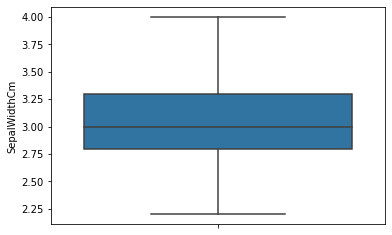

<Figure size 720x360 with 0 Axes>

In [34]:
sns.boxplot(y=data["SepalWidthCm"])
plt.figure(figsize=(10,5))
plt.show()

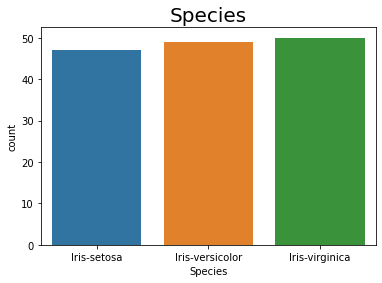

In [35]:
sns.countplot(x='Species',data=data)
plt.title('Species',fontsize=20)
plt.show()

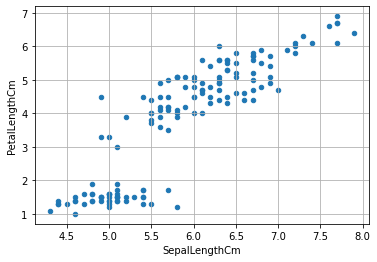

In [37]:
data.plot(kind ="scatter", 
          x ='SepalLengthCm', 
          y ='PetalLengthCm') 
plt.grid()

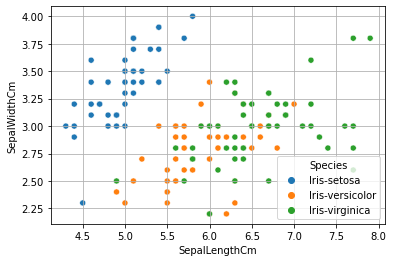

In [38]:
sns.scatterplot(x=data["SepalLengthCm"],
                y=data["SepalWidthCm"], 
                hue=data["Species"])
plt.grid()
plt.show()

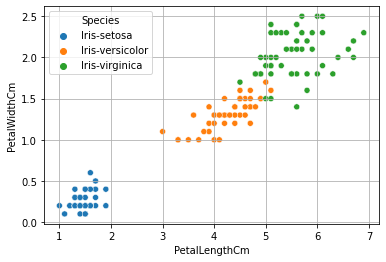

In [39]:
sns.scatterplot(x=data["PetalLengthCm"], 
                y=data["PetalWidthCm"], 
                hue=data["Species"])
plt.grid()
plt.show()

# Using the elbow method to find the optimal number of clusters

In [41]:
X = data.iloc[:, [0,1,2,3]].values
print(X)

[[  1.    5.1   3.5   1.4]
 [  2.    4.9   3.    1.4]
 [  3.    4.7   3.2   1.3]
 [  4.    4.6   3.1   1.5]
 [  5.    5.    3.6   1.4]
 [  6.    5.4   3.9   1.7]
 [  7.    4.6   3.4   1.4]
 [  8.    5.    3.4   1.5]
 [  9.    4.4   2.9   1.4]
 [ 10.    4.9   3.1   1.5]
 [ 11.    5.4   3.7   1.5]
 [ 12.    4.8   3.4   1.6]
 [ 13.    4.8   3.    1.4]
 [ 14.    4.3   3.    1.1]
 [ 15.    5.8   4.    1.2]
 [ 17.    5.4   3.9   1.3]
 [ 18.    5.1   3.5   1.4]
 [ 19.    5.7   3.8   1.7]
 [ 20.    5.1   3.8   1.5]
 [ 21.    5.4   3.4   1.7]
 [ 22.    5.1   3.7   1.5]
 [ 23.    4.6   3.6   1. ]
 [ 24.    5.1   3.3   1.7]
 [ 25.    4.8   3.4   1.9]
 [ 26.    5.    3.    1.6]
 [ 27.    5.    3.4   1.6]
 [ 28.    5.2   3.5   1.5]
 [ 29.    5.2   3.4   1.4]
 [ 30.    4.7   3.2   1.6]
 [ 31.    4.8   3.1   1.6]
 [ 32.    5.4   3.4   1.5]
 [ 35.    4.9   3.1   1.5]
 [ 36.    5.    3.2   1.2]
 [ 37.    5.5   3.5   1.3]
 [ 38.    4.9   3.1   1.5]
 [ 39.    4.4   3.    1.3]
 [ 40.    5.1   3.4   1.5]
 

# k-means clustering

C:\Users\91992.LAPTOP-E0OP569H\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


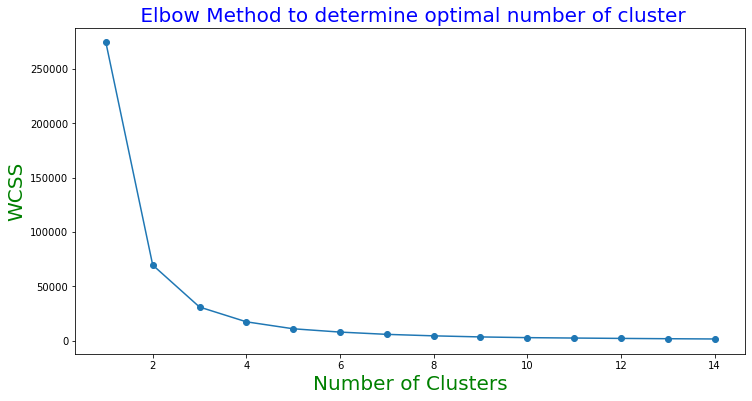

In [44]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1, 15), wcss, marker = 'o')
plt.title(' Elbow Method to determine optimal number of cluster', size = 20, color = "Blue")
plt.xlabel('Number of Clusters', size = 20, color = "Green")
plt.ylabel('WCSS', size = 20, color = "Green")
plt.show()

# Training the K-Means model on the dataset

In [45]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Visualising the clusters

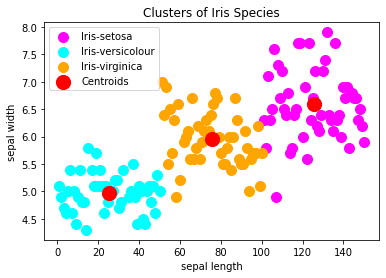

In [46]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'magenta', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'cyan', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, c = 'red', label = 'Centroids')
plt.title('Clusters of Iris Species')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()